#  Анализ рейтинга и успешности игровых жанров

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

__Описание данных__

+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Откроем файл с данными и изучите общую информацию

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from statistics import *


In [2]:
games = pd.read_csv('games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__Вывод:__ В датафрейме 11 столбцов 11 столбцов и 16715 строк. 
Есть пропущенные знаяения в 7 столбцах name, year_of_release, genre, critic_score, user_score, rating.
В столбцах встречаются следующие типы данных object и float64.

## Подготовка данных

### Заменим названия столбцов приведем к нижнему регистру

In [4]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме 11 столбцов и 16715 строк. 
Есть пропущенные знаяения в 7 столбцах name, year_of_release, genre, critic_score, user_score, rating.
В столбцах встречаются следующие типы данных object и float64.

Заменим тип данных в следующих столбцах:
+ year_of_release с float на int, т.к год это целое 4-х значное число. 
+ user_score с object на float, т.к эти числовые значения с 1 знаком после запятой.

Замену произведем после удаления пропущенных значений.

In [6]:
# посмотрим на количество пропущенных значений
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Опишем причину возникновения пропуской в следующих столбцах:

+ __2__  в столбце name - данные просто не заполнили, удалим их из выборки из-за несущественного количества, возможно они совпадают с пропусками в столбце genre и др.столбцах.

+ __269__ в столбце year_of_release - отсутствие данных может быть связанно с тем что игра могла еще не поступить в продажу.

+ __2__ в столбце genre  - данные просто не заполнили, удалим их из выборки из-за несущественного количества, возможно они совпадают с пропусками в столбце name и др.столбцах.

+ __8578__ в столбце critic_score - отсутствие данных может быть связанно с тем что игра могла еще не поступить в продажу.

+ __6701__ в столбце user_score - отсутствие данных может быть связанно с тем что игра могла еще не поступить в продажу.

+ __6766__ в столбце rating - отсутствие данных может быть связанно с тем что игра могла еще не поступить в продажу.


### Обработаем пропущенные значения при необходимости

In [7]:
#посмотрим на пропуски в строках name и genre
display(games.query('name != name'),
        games.query('genre != genre'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
#посмотрим сколько процентов от всех значений составляют пропуски в строке year_of_release
(games.shape[0] - games['year_of_release'].dropna().count()) / games.shape[0]

0.01609332934489979

Пропущенных зачений в колонке year_of_release -  269, что составляет 1,6 % их можно удалить.

In [9]:
#удалим пропуски в столбцах name, genre, year_of_release и поменяет тип в столбце year_of_release на int
games.dropna(subset =['name','genre','year_of_release'], inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)
#games['user_score'] = games['user_score'].astype(float)

In [10]:
# посмотрим на уникальные значения в столбцах critic_score, user_score и rating
display(games['critic_score'].unique(),
        games['user_score'].unique(),
        games['rating'].unique())

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Во всех трех столбцах в данных есть Nan, т.е. данные по рейтингу отсутствует. Некорректно заполнять Nan ни медианным значение, ни нулевым. Так и оставим Nan.

В столбце user_score присутствует помимо Nan значение tbd (to be determined (будет определено)). Используется, если какая-то информация еще не определена или решение по вопросу не принято, т.е нет оценки пользователей, может из-за того что игра недавно вышла, заменим на Nan. И тип изменим с object на float.

В столбце rating указан рейтинг присвоенный организацией Entertainment Software Rating Board. __ESRB__ — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

По данным википедии (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) имеет 8 значений:
+   __EC__ («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

+ __E__ («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults").

+ __E10+__ («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.

+ __T__ («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

+ __M__ («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
 
+ __AO__ («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое. 

+ __RP__ («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

+ __RP 17+__ («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант.

В данных википедии нет рейтинга __К-А__. Он был переименован в рейтинг __Е__ в 1998 году. Произведем замену в данных.
Причиной появления Nan в данных объясняются тем, что данный рейтинг используется для компьютерных игр в США и Канаде, а игры выпускаются не только в этих странах. Значит пропуск не связан с ошибкой заполнения данных. Заменим Nan на unknow.

In [11]:
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'] = games['user_score'].astype(float)

In [12]:
games['rating'].replace('K-A', 'E', inplace=True)
games['rating'].fillna('unknown', inplace=True) 

In [13]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [14]:
# проверим наличие неявных дубликатов
games.duplicated().sum()

0

### Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [15]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [16]:
display(games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


__Вывод:__

В датафрейме удалены пропуски в столбцах name, genre т.к. без этих данных объект не возможно идентифицировать. Ввиду того, что процент пропусков в столбце year_of_release состовляет  1,6 % от всех строк, данные пропуски тоже были удалены. Видимо данные игры еще не поступили в продажу.

В датафреме произведена замена значений:
+ tbd в столбце user_score на nan,
+ устаревший рейтинг К-А в столбце rating заменен на Е, столбцы с Nan заменены на unknown.

Измененены типы данных в столбцах year_of_release, user_score на числовой.
Названия столбцов в дататфрейме приведены к нижнему регистру.
Добавлен столбец total_sales с сумарными продажами по всем регионам.

__Причины появления пропусков:__

+ в столбце year_of_release могли быть вызваны либо человеческим фактором (ошибочноне проставили значение года), либо тем, что игра создана, но еще не выпущена в продажу; 
+ в столбцах name и genre, вызваны ошибкой ввода данных(человеческим фактором), в этом случае объект не возможно идентифицировать;
+ в столбцах critic_score, user_score вызван что пользователи и эксперты просто не оставили отзывы по этим объектам;
+ в столбце rating, вызваны тем, что данный рейтинг используется для компьютерных игр в США и Канаде, а игры выпускаются не только в этих странах. 


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы


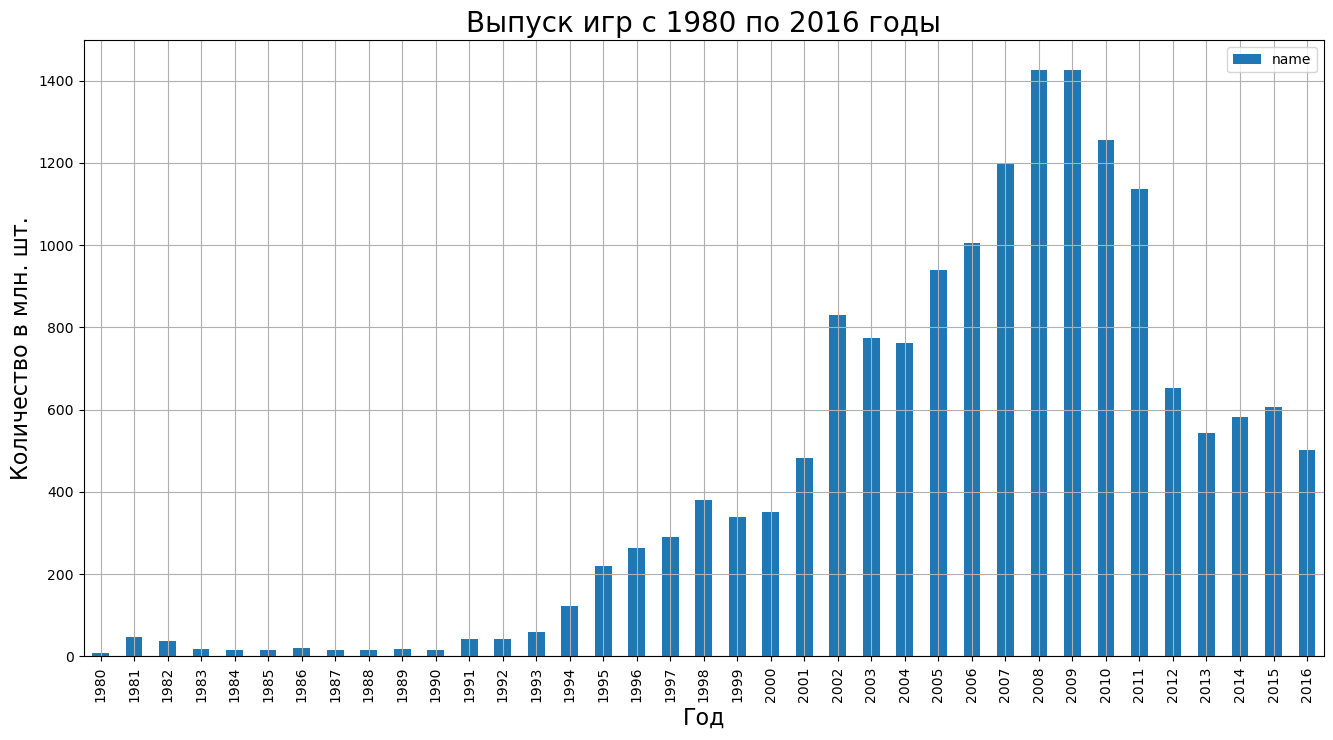

In [17]:
release_games = games.pivot_table(index='year_of_release',
                                 values='name',
                                 aggfunc='count')
release_games.plot(kind='bar',
    grid=True,
    figsize= (16,8)
    )
plt.title('Выпуск игр с 1980 по 2016 годы', fontsize = 20)
plt.xlabel('Год', fontsize = 16)
plt.ylabel('Количество в млн. шт.', fontsize = 16)
plt.show()

__Вывод:__ Выпуск игр начинается с 1980 года, более попурярным игры стали с 1995 , что связано доступностью для населения персональных компьютеров.Пик приходится на период с 2008 по 2010, выпускалось более 1400 млн. штук. После 2010 наблюдается спад, который связан с мировым экономическим кризисом, после окончания кризиса 2013-2014 наблюдается опять рост, связанный с появление денег на разработку игр.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

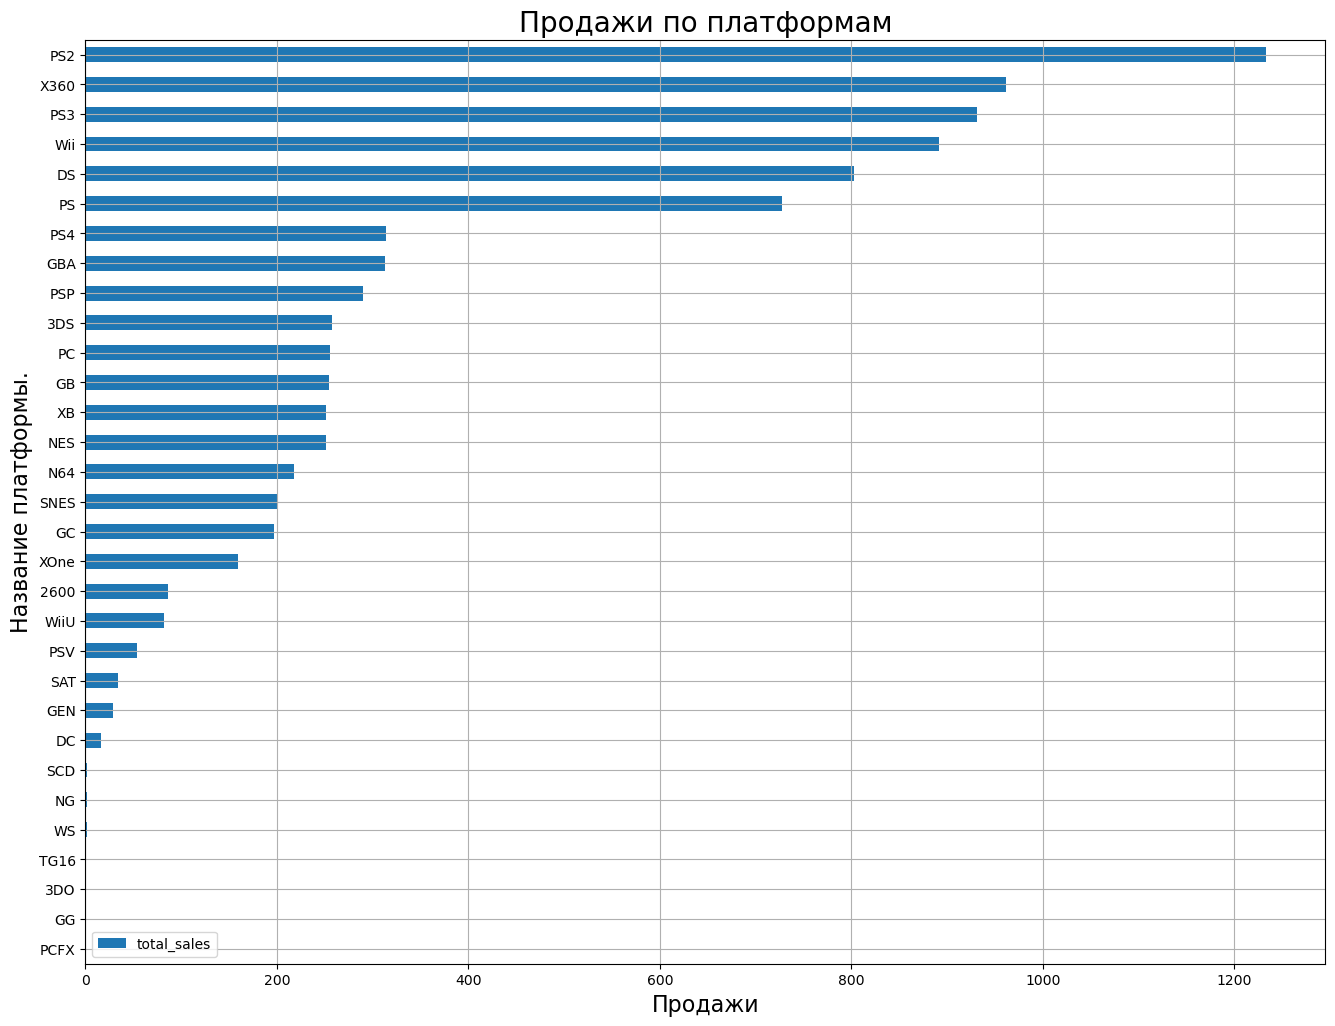

,total_sales
count,31.000000
mean,284.334516
std,343.954144
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


In [18]:
platform_sales = games.pivot_table(index='platform',
                                 values='total_sales',
                                 aggfunc='sum').sort_values(by='total_sales')
platform_sales.plot(kind='barh',
    grid=True,
    figsize= (16,12)
    )
plt.title('Продажи по платформам', fontsize = 20)
plt.xlabel('Продажи', fontsize = 16)
plt.ylabel('Название платформы.', fontsize = 16)
plt.show()
None
display(platform_sales.describe())

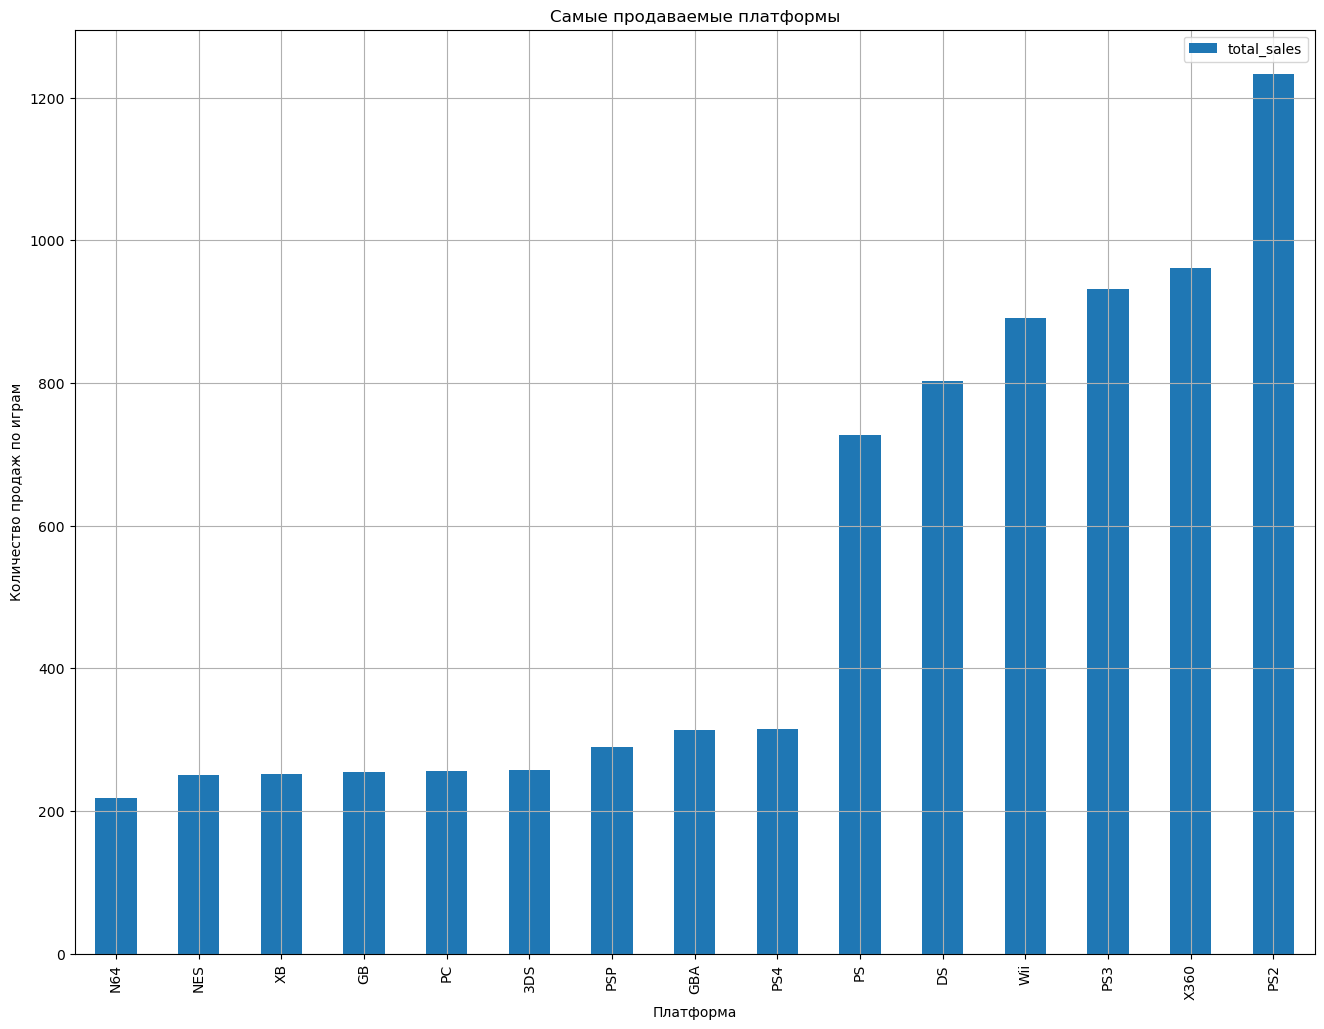

In [19]:
#Будем считать наиболее продаваемыми платформы, где количество продаж больше медианного, т.е более 200 мл. копий
top_platforms = platform_sales[platform_sales['total_sales'] > platform_sales.median()['total_sales']]
top_platforms.sort_values(by = 'total_sales').plot.bar(figsize= (16,12),
                                                       grid = True)
plt.title('Самые продаваемые платформы')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж по играм')
plt.show()
None

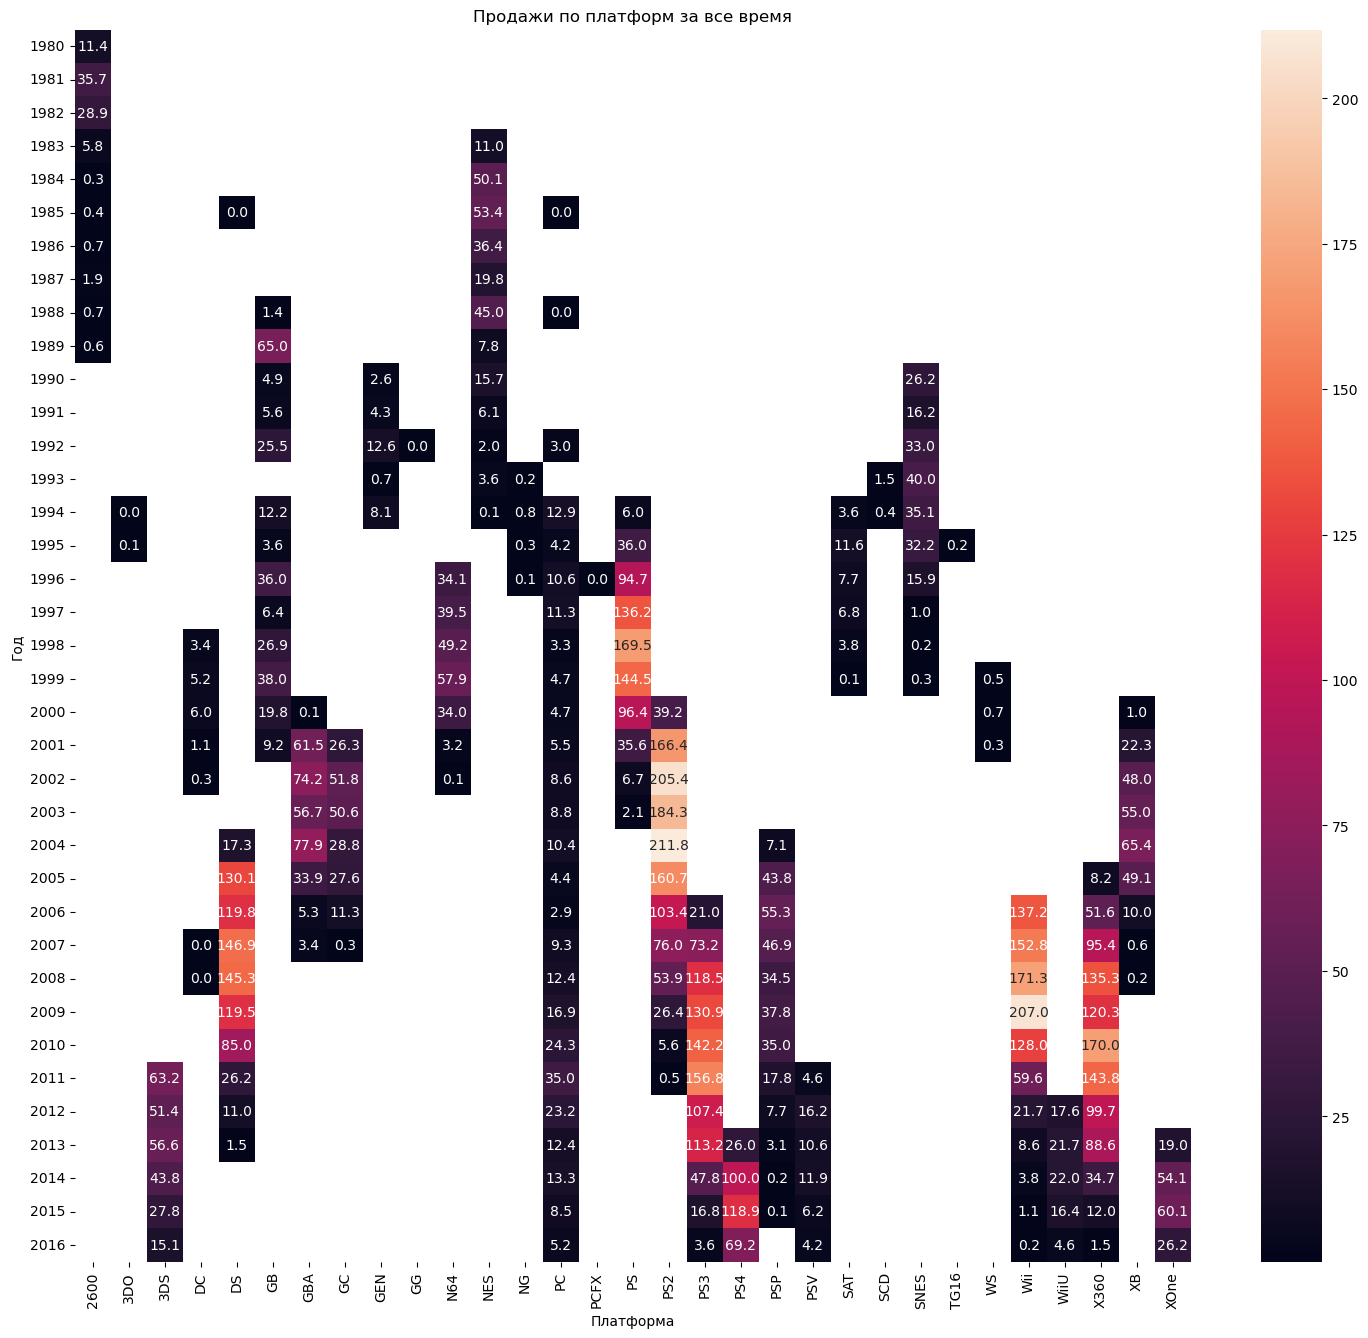

In [20]:
#построим тепловую карту
data_by_platforms = games.pivot_table(index='year_of_release',
                                      columns='platform',
                                      values='total_sales',
                                      aggfunc='sum')

plt.figure(figsize=(18,16))
sns.heatmap(data_by_platforms, annot=True, fmt=".1f")
plt.title('Продажи по платформ за все время')
plt.xlabel('Платформа')
plt.ylabel('Год')
None

Благодаря тепловой карте наглядно видно сколько в среднем живут платформы.

In [21]:
#создадим функцию подсчета среднего срока жизни платформы
def get_avg_live_time(data):
    sizes = []
    for plat in data:
        value = data[data[plat].notna()][plat].shape[0]
        sizes.append(value)
    return sizes
list_sizes = get_avg_live_time(data_by_platforms)
print(f'В среднем платформы живут на рынке {median(list_sizes)} лет')

В среднем платформы живут на рынке 7 лет


### Возьмем данные за соответствующий актуальный период. Актуальный период определим в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Справедливо взять актуальный период 4 года (половина жизни платформы), т.к. среднее время жизни жизни платформы - 7 лет, т.е данные за период 2013-2016.


In [22]:
games_actual_period = games.query('year_of_release >= 2013').reset_index()
games_actual_period

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2229,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2230,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2231,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

Построим heatmap чтобы выделить лидирующие платформы.

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


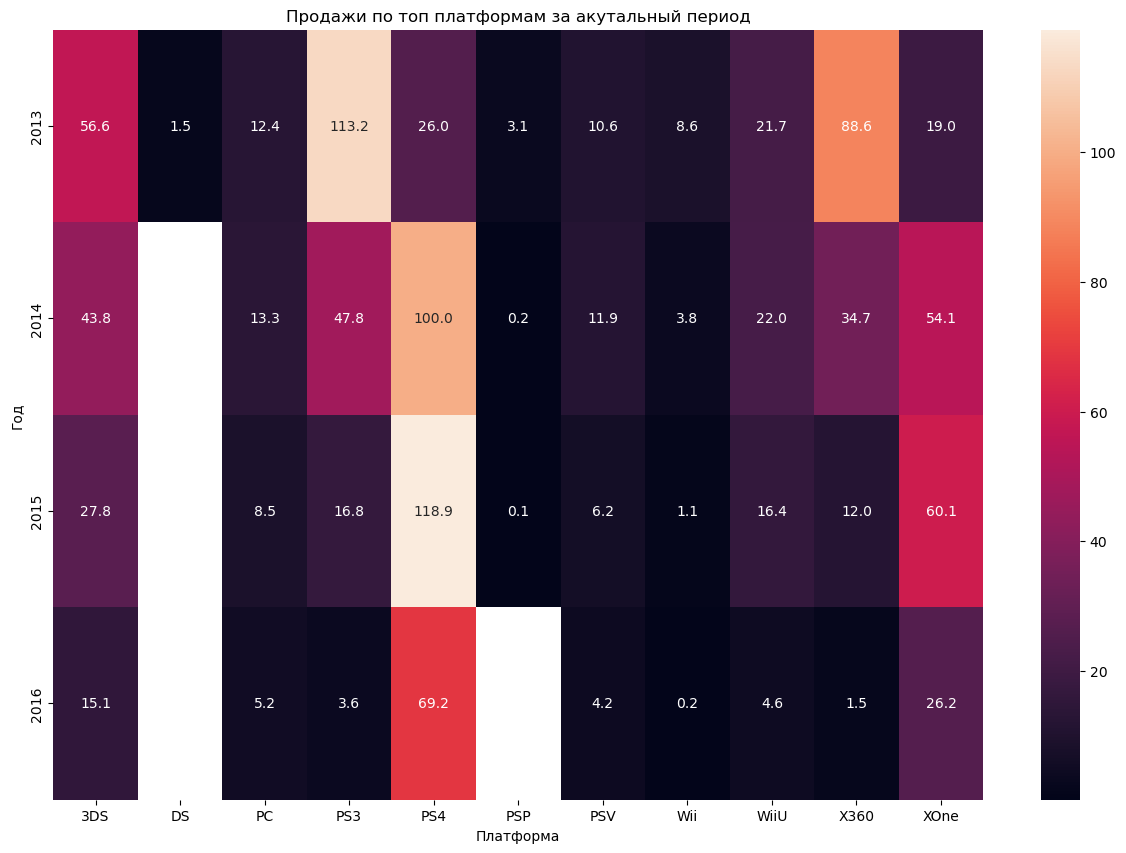

In [23]:
data_by_platforms = games_actual_period.pivot_table(index='year_of_release',
                                      columns='platform',
                                      values='total_sales',
                                      aggfunc='sum')
display(data_by_platforms)

plt.figure(figsize=(15,10))
sns.heatmap(data_by_platforms, annot=True, fmt=".1f")
plt.title('Продажи по топ платформам за акутальный период')
plt.xlabel('Платформа')
plt.ylabel('Год')
None

Как видим лидерами являются к 2016 году являются PS4, 3DS, XOne. Одновременно, можно заметить общее тенденцию к снижению продаж к 2016 году.

### Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [24]:
data_by_platform_sum_sales = games_actual_period.pivot_table(index = 'platform',
                                                           values = 'total_sales',
                                                           aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
data_by_platform_sum_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


In [25]:
#Возьмем топ-5 платфор по продажам PS4, PS3, XOne, 3DS, X360.
games_actual_period_platforms = games_actual_period.query('platform in ["PS4", "PS3", "XOne", "3DS", "X360"]')


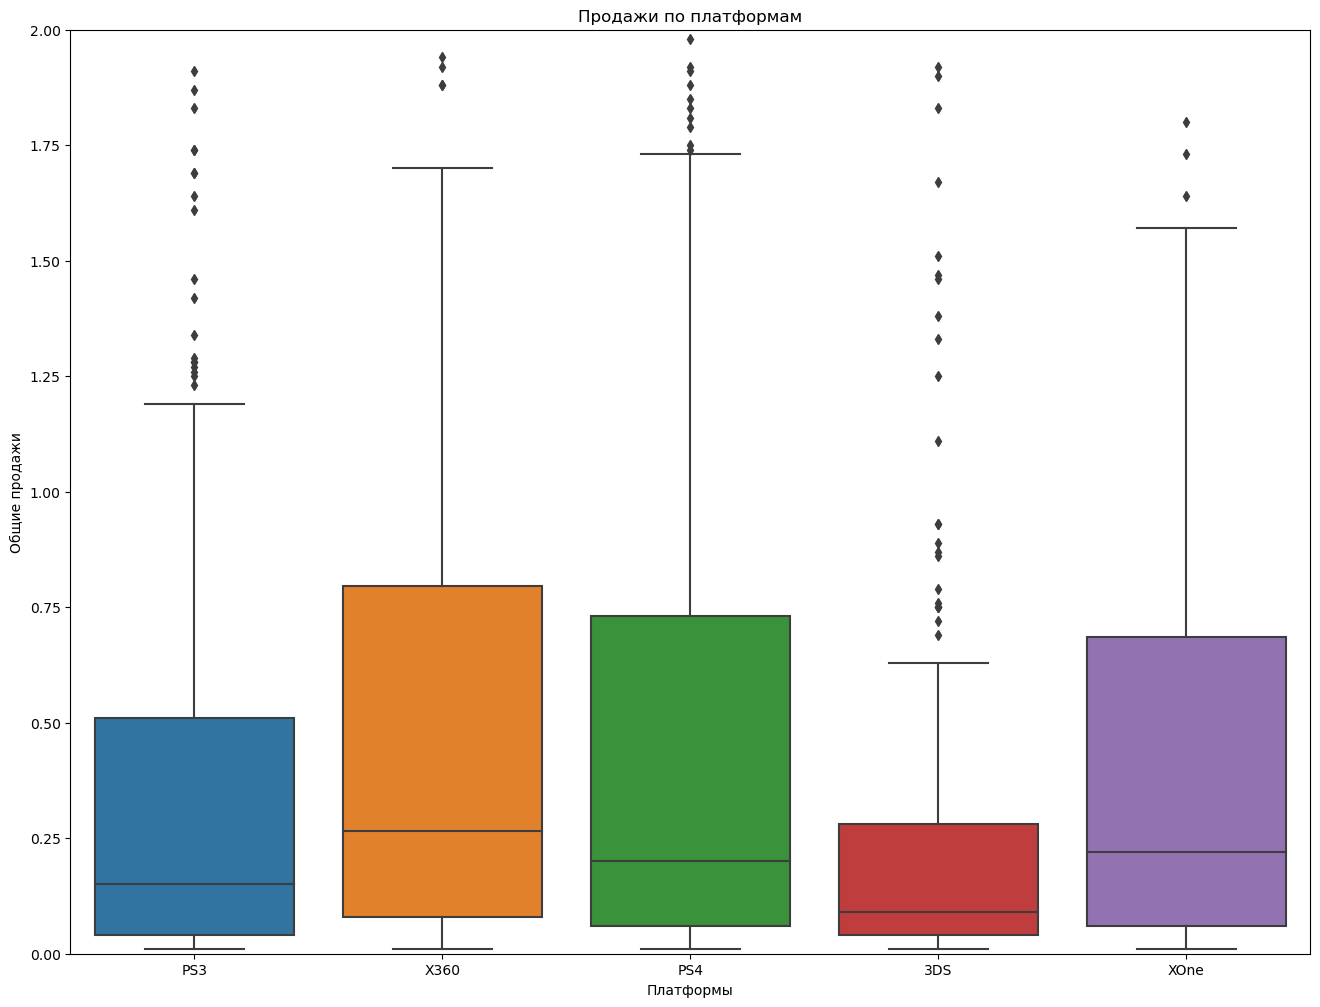

In [26]:
plt.figure(figsize=(16, 12))
sns.boxplot(data = games_actual_period_platforms,
            y ='total_sales', 
            x='platform') 
plt.title('Продажи по платформам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0,2)
plt.show()

Из графика видно, что практически у всех платформ распределение смещено в сторону максимальных значений. Медиана у лидирующих платформ примерно на одном и том же уровне.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

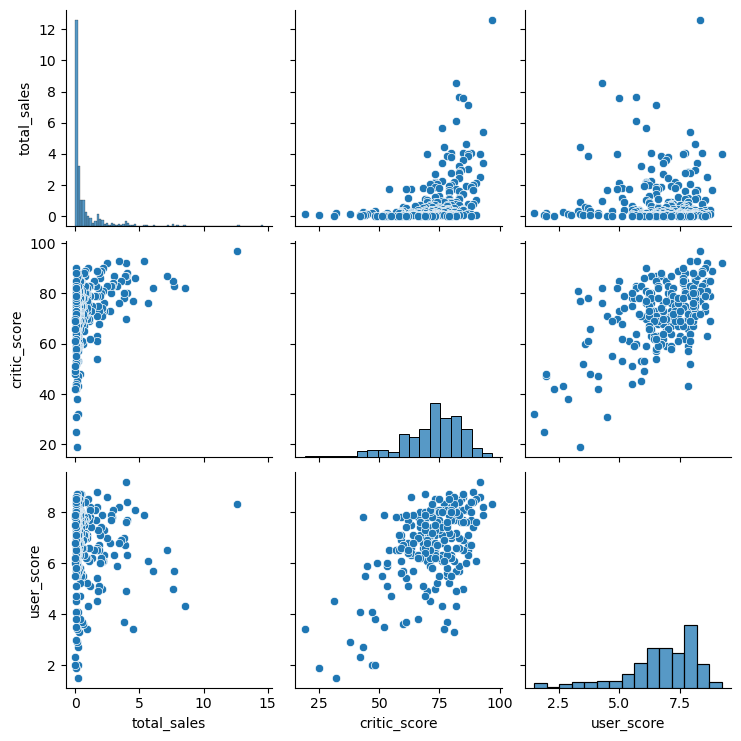

In [27]:
# возмем платформу PS4
sns.pairplot(
    games_actual_period[games_actual_period.platform == "PS4"]
    [['total_sales', 'critic_score', 'user_score']]
)
plt.show()

In [28]:
games_actual_period[games_actual_period.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Кореляция слабая, значит продажи не зависят ни от оценок пользователей, ни от критиков. У критиков связь больше, чем у пользователей, но все равно не существенна 0,4.


### Соотнесем выводы с продажами игр на других платформах.

In [29]:
#возьмем другие платформы
other_platforms = ['PS4','XOne','PC','WiiU','3DS', 'PSV']
for i in other_platforms:
    display(games_actual_period[games_actual_period.platform == i][['total_sales', 'critic_score', 'user_score']].corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.254742,0.000942
critic_score,0.254742,1.000000,0.611521
user_score,0.000942,0.611521,1.000000


Кореляция слабая, значит продажи не зависят ни от оценок пользователей, ни от критиков. Значения не превышаот  значения 0,42.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [30]:
data_by_genre_sum_sales = games_actual_period.pivot_table(index = 'genre',
                                                           values = 'total_sales',
                                                           aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
data_by_genre_sum_sales

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


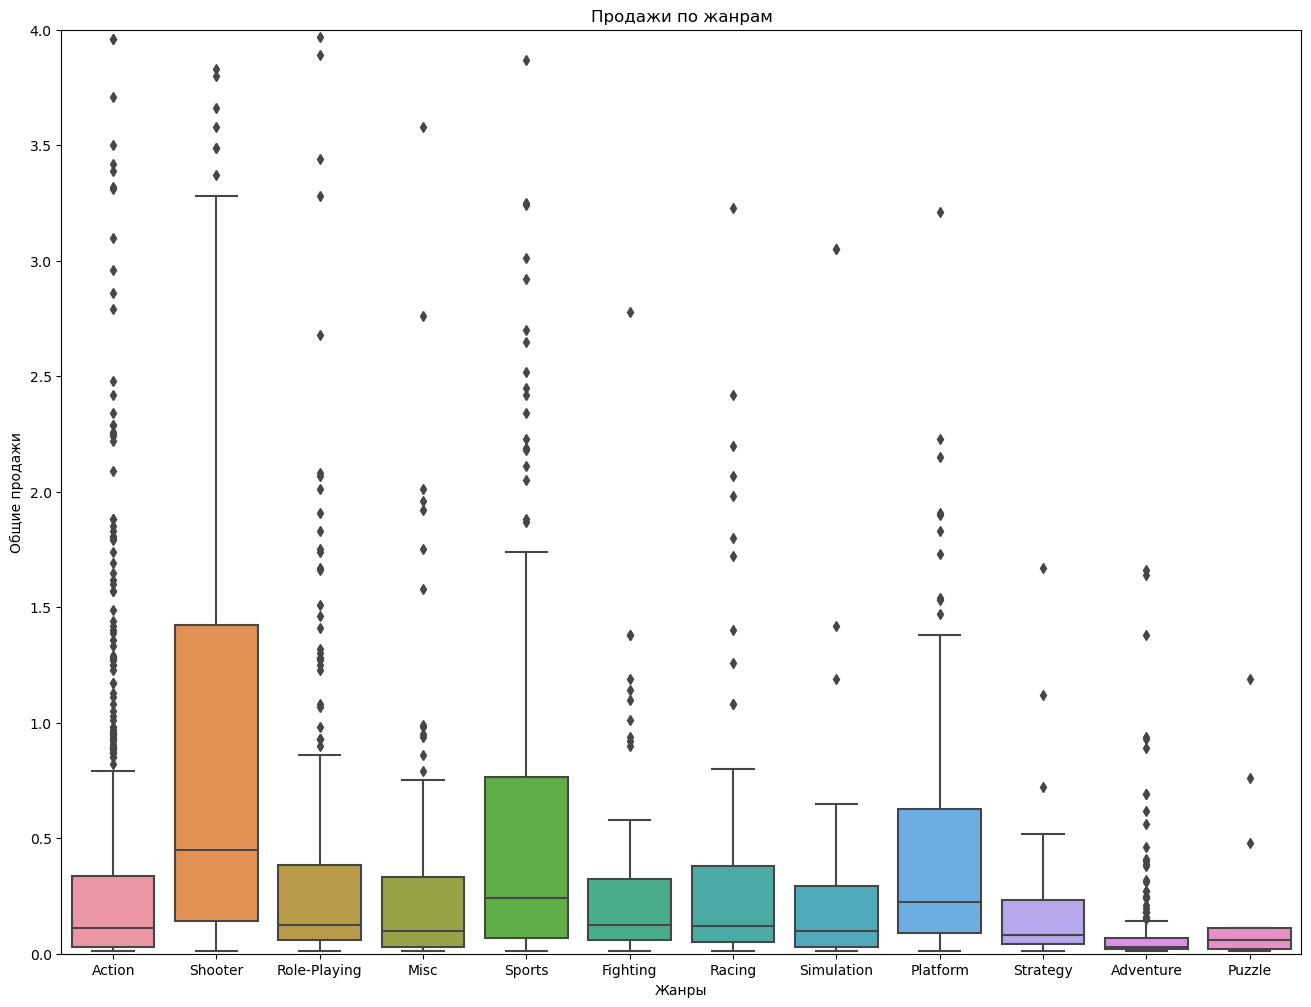

In [31]:
plt.figure(figsize=(16, 12))
sns.boxplot(data = games_actual_period,
            y ='total_sales', 
            x='genre') 
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')
plt.ylim(0,4)
plt.show()

Из графика видно, что практически у всех жанров распределение смещено в сторону максимальных значений. Медиана у лидирующих платформ жанров примерно на одном и том же уровне.
Самые высокие продажи у жанра - Action, Scooter и Sports.
Самые низкие - Puzzle.

__Вывод:__ 

Выпуск игр начинается с 1980 года, более попурярным игры стали с 1995, что связано доступностью для населения персональных компьютеров. __Пик приходится на период с 2008 по 2010, выпускалось более 1400 млн. штук.__ После 2010 наблюдается спад, который связан с мировым экономическим кризисом, после окончания кризиса 2013-2014 наблюдается опять рост, связанный с появление денег на разработку игр.

__Лидером продаж__ считаются платформы PS2 (более 1233 млн. копий), X360, PS3.

Платформы имеют разную продолжительность существование, в среднем она состовляет 7 лет. Минимальная продолжительность жизни платформы 1 год, максимальная 26 лет. Справедливо взять актуальный период 4 года (половина жизни платформы), т.е данные за период 2013-2016.

Справедливо взять актуальный период 4 года (половина жизни платформы), т.е данные за период 2013-2016.

__Наиболее прибольные платформы:__
+ PS4, PS3, XOne, 3DS, X360

__Наиболее прибольные жанры:__
+ Action, Shooter, Sports

Отсутствует корреляция между отзывами критиков и пользователей с продажами на всех и отдельно взятых платформах. Т.е. продажи от них практически не зависят.

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):
+ Самые популярные платформы (топ-5). Опишите различия в долях продаж.
+ Самые популярные жанры (топ-5). Поясните разницу.
+ Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [32]:
#Выведен топ-5 платформ
na = games_actual_period.groupby('platform')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = games_actual_period.groupby('platform')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = games_actual_period.groupby('platform')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

display(na,eu,jp)

,platform,na
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


,platform,eu
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


,platform,jp
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


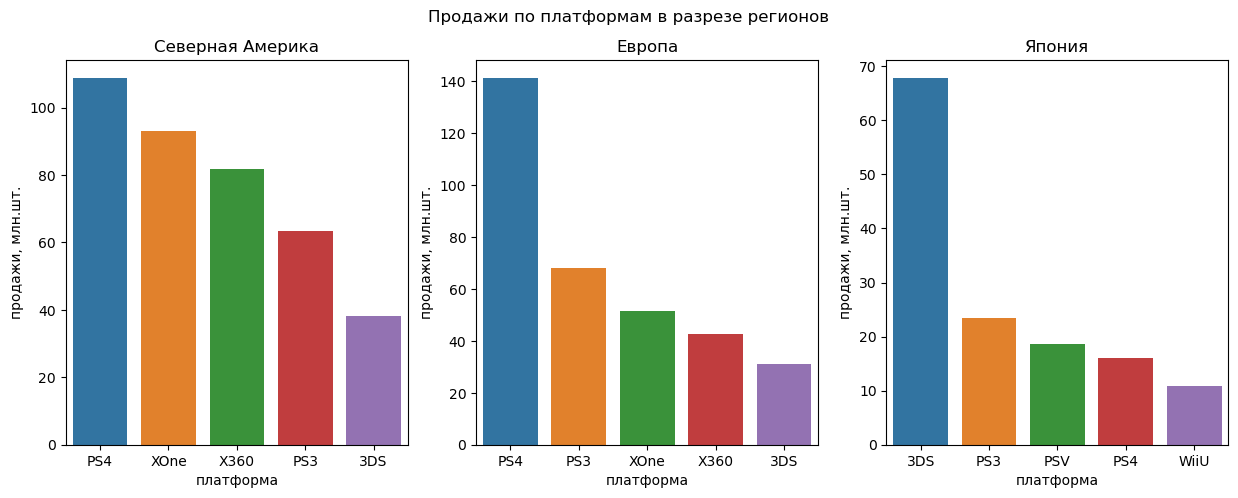

In [33]:
# Продажи по платформам в разрезе регионов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по платформам в разрезе регионов')

sns.barplot(y='na', x='platform', data=na, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.шт.')
ax[0].set_xlabel('платформа')

sns.barplot(y='eu', x='platform', data=eu, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.шт.')
ax[1].set_xlabel('платформа')

sns.barplot(y='jp', x='platform', data=jp, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.шт.')
ax[2].set_xlabel('платформа')
plt.show()              

In [34]:
#Выведен топ-5 жанров по регионам
na = games_actual_period.groupby('genre')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu = games_actual_period.groupby('genre')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp = games_actual_period.groupby('genre')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

display(na,eu,jp)

,genre,na
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


,genre,eu
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


,genre,jp
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


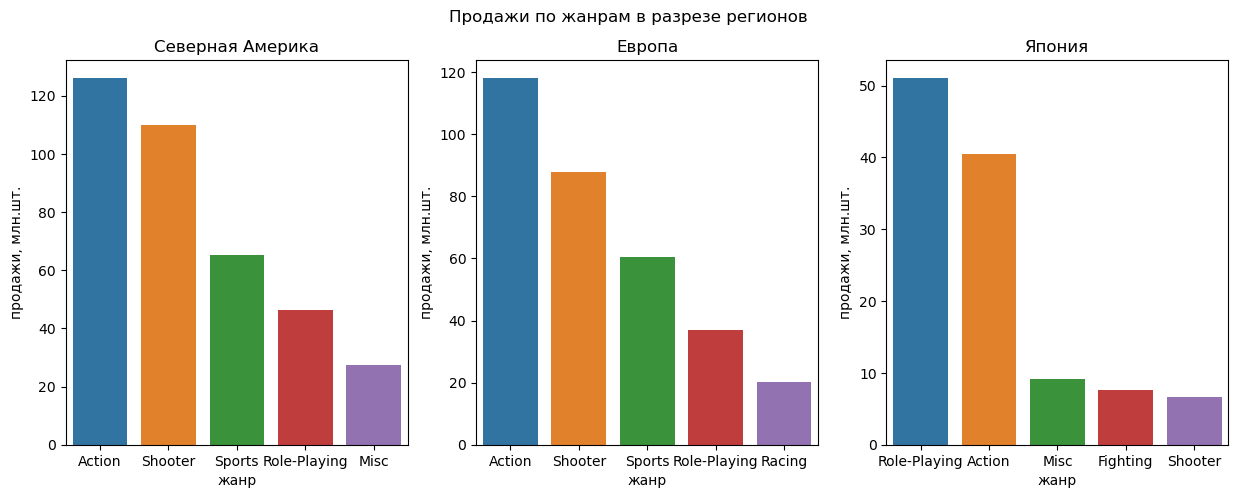

In [35]:
# Продажи по жанрам в разрезе регионов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Продажи по жанрам в разрезе регионов')

sns.barplot(y='na', x='genre', data=na, ax=ax[0])
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.шт.')
ax[0].set_xlabel('жанр')

sns.barplot(y='eu', x='genre', data=eu, ax=ax[1])
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.шт.')
ax[1].set_xlabel('жанр')

sns.barplot(y='jp', x='genre', data=jp, ax=ax[2])
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.шт.')
ax[2].set_xlabel('жанр')
plt.show()   

In [36]:
#Выведен топ-5 жанров по регионам
na_rating = games_actual_period.groupby('rating')['na_sales'].agg(na='sum').nlargest(5, 'na').reset_index()
eu_rating = games_actual_period.groupby('rating')['eu_sales'].agg(eu='sum').nlargest(5, 'eu').reset_index()
jp_rating = games_actual_period.groupby('rating')['jp_sales'].agg(jp='sum').nlargest(5, 'jp').reset_index()

display(na,eu,jp)

,genre,na
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


,genre,eu
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


,genre,jp
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


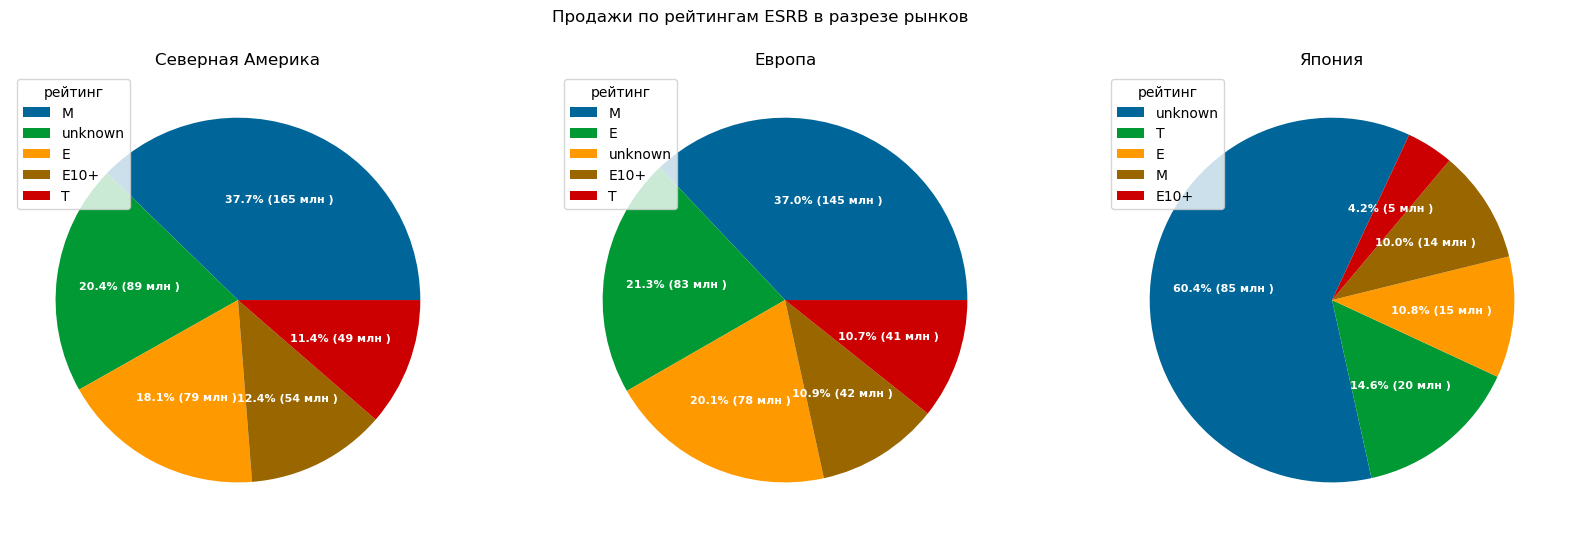

In [37]:
fig, ax = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Продажи по рейтингам ESRB в разрезе рынков')
data1, categories1 = na_rating['na'], na_rating['rating']
data2, categories2 = eu_rating['eu'], eu_rating['rating']
data3, categories3 = jp_rating['jp'], jp_rating['rating']
colors = ['#006699','#009933','#FF9900','#996600', '#CC0000']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} млн )".format(pct, absolute)

wedges, texts, autotexts = ax[0].pie(data1 ,autopct=lambda pct: func(pct, data1), textprops=dict(color="w"), colors=colors)
ax[0].set_title("Северная Америка")
ax[0].legend(wedges, categories1, title="рейтинг", loc="upper left")
plt.setp(autotexts, size=8, weight=850)

wedges, texts, autotexts = ax[1].pie(data2 ,autopct=lambda pct: func(pct, data2), textprops=dict(color="w"),colors=colors)
ax[1].set_title("Европа")
ax[1].legend(wedges, categories2, title="рейтинг", loc="upper left")
plt.setp(autotexts, size=8, weight=850)

wedges, texts, autotexts = ax[2].pie(data3 ,autopct=lambda pct: func(pct, data3), startangle = 65, textprops=dict(color="w"),colors=colors)
ax[2].set_title("Япония")
ax[2].legend(wedges, categories3, title="рейтинг", loc="upper left")
plt.setp(autotexts, size=8, weight=850)
plt.show()   

__Вывод:__

__Топ-5 платформ:__
Популярность платформ похожа в регионах Северной Америки и Европы, на первом месте PS4, на пятом 3DS. Со 2-4 места из топа 5 платформ занимают PS3, XOne, X360, но места отличаются в регионах Северной Америке и Европе. В Японии же наоборот 3DS на 1-м месте топа. Также в топ входят платформы из Северной Америки и Европы PS4, PS3 и неизвестные платформы PSV и WiiU.

__Топ-5 жанров:__
Популярность жанров практически идентична в регионах Северной Америки и Европы: Action, Shooter,Sports,Pole-Playing. Далее на 5 месте в Америке - Misc, в Европе -  Racing. В Японии же Role-Playing на 1-м мксте, далее идут Action, Misc, Fighting, Shooter.

__Топ-5 рейтинга:__  
В регионах Северной Америки и Европы по объёмам продаж лидируют игры с рейтингом M, далее идут игры без рейтинга. В Японии лидируют продажи игр с без рейтинга, потом идут изры с рейтингом T, которые в Америке и Европе на последнем месте.


## Проверим гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

### Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая и альтернативная гипотезы:

__Гипотеза Н0:__ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

__Гипотеза Н1:__ Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [38]:
platform_xone = games_actual_period.query('platform == "XOne"')['user_score'].dropna()
platform_pc = games_actual_period.query('platform == "PC"')['user_score'].dropna()

results = st.ttest_ind(platform_xone,
                       platform_pc,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.07006329201805823
Не удалось отвергнуть нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет основания отвергнуть
нулевую гипотезу, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая и альтернативная гипотезы:

__Гипотеза Н0:__ Средние пользовательские рейтинги жанров Action  и Sports одинаковые.

__Гипотеза Н1:__ Средние пользовательские рейтинги жанров Action  и Sports  разные.

In [39]:
genre_action = games_actual_period.query('genre == "Action"')['user_score'].dropna()
genre_sports = games_actual_period.query('genre == "Sports"')['user_score'].dropna()

results = st.ttest_ind(genre_action,
                       genre_sports,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

5.2589161945700115e-28
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания  отвергнутьнулевую гипотезу в пользу альтернативной.

__Вывод:__ На уровне значимости 5% (уровне доверия 95%) можно утверждать:
+ средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
+ средние пользовательские рейтинги жанров Action и Sports разные.

## ОБЩИЙ ВЫВОД

__Предобработка данных__

В датафрейме 11 столбцов и 16715 строк. Есть пропущенные знаяения в 7 столбцах.
В датафрейме удалены пропуски в столбцах name, genre т.к. без этих данных объект не возможно идентифицировать. Ввиду того, что процент пропусков в столбце year_of_release состовляет 1,6 % от всех строк, данные пропуски тоже были удалены. Видимо данные игры еще не поступили в продажу.

В датафреме произведена замена значений:
+ tbd в столбце user_score на nan,
+ устаревший рейтинг К-А в столбце rating заменен на Е, столбцы с Nan заменены на unknown.
Измененены типы данных в столбцах year_of_release, user_score на числовой. Названия столбцов в дататфрейме приведены к нижнему регистру. Добавлен столбец total_sales с сумарными продажами по всем регионам.

__Исследовательский анализ данных__

Выпуск игр начинается с 1980 года, более попурярным игры стали с 1995, что связано доступностью для населения персональных компьютеров. __Пик приходится на период с 2008 по 2010, выпускалось более 1400 млн. штук.__ После 2010 наблюдается спад, который связан с мировым экономическим кризисом, после окончания кризиса 2013-2014 наблюдается опять рост, связанный с появление денег на разработку игр.

__Лидером продаж__ считаются платформы PS2 (более 1233 млн. копий), X360, PS3.

Платформы имеют разную продолжительность существование, в среднем она состовляет 7 лет. Минимальная продолжительность жизни платформы 1 год, максимальная 26 лет. Справедливо взять актуальный период 4 года (половина жизни платформы), т.е данные за период 2013-2016.

Справедливо взять актуальный период 4 года (половина жизни платформы), т.е данные за период 2013-2016.

__Наиболее прибольные платформы:__
+ PS4, PS3, XOne, 3DS, X360

__Наиболее прибольные жанры:__
+ Action, Shooter, Sports

Отсутствует корреляция между отзывами критиков и пользователей с продажами на всех и отдельно взятых платформах. Т.е. продажи от них практически не зависят.

__Топ-5 платформ:__

Популярность платформ похожа в регионах Северной Америки и Европы, на первом месте PS4, на пятом 3DS. Со 2-4 места из топа 5 платформ занимают PS3, XOne, X360, но места отличаются в регионах Северной Америке и Европе. В Японии же наоборот 3DS на 1-м месте топа. Также в топ входят платформы из Северной Америки и Европы PS4, PS3 и неизвестные платформы PSV и WiiU.

__Топ-5 жанров:__

Популярность жанров практически идентична в регионах Северной Америки и Европы: Action, Shooter,Sports,Pole-Playing. Далее на 5 месте в Америке - Misc, в Европе -  Racing. В Японии же Role-Playing на 1-м мксте, далее идут Action, Misc, Fighting, Shooter.

__Топ-5 рейтинга:__ 

В регионах Северной Америки и Европы по объёмам продаж лидируют игры с рейтингом M, далее идут игры без рейтинга. В Японии лидируют продажи игр с без рейтинга, потом идут изры с рейтингом T, которые в Америке и Европе на последнем месте.


__Проверка гипотез__

На уровне значимости 5% (уровне доверия 95%) можно утверждать:
+ средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
+ средние пользовательские рейтинги жанров Action и Sports разные.